# let us get started
I’ll start by importing modules and loading the data set into Python environment:

In [80]:
import pandas as pd
import numpy as np
data = pd.read_csv("train.csv", index_col="Loan_ID")
data.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0,NaN,360,1,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y


# 1 – Boolean Indexing

What do you do, if you want to filter values of a column based on conditions from another set of columns? For instance, we want a list of all females who are not graduate and got a loan. Boolean indexing can help here. You can use the following code:

In [60]:
data.loc[(data["Gender"]=="Female") & (data["Education"]=="Not Graduate") & (data["Loan_Status"]=="Y"),
         ["Gender","Education","Loan_Status"]]


,Gender,Education,Loan_Status
Loan_ID,,,
LP001155,Female,Not Graduate,Y
LP001669,Female,Not Graduate,Y
LP001692,Female,Not Graduate,Y
LP001908,Female,Not Graduate,Y
LP002300,Female,Not Graduate,Y
LP002314,Female,Not Graduate,Y
LP002407,Female,Not Graduate,Y
LP002489,Female,Not Graduate,Y
LP002502,Female,Not Graduate,Y


# 2 – Apply Function

It is one of the commonly used functions for playing with data and creating new variables. Apply returns some value after passing each row/column of a data frame with some function. The function can be both default or user-defined. For instance, here it can be used to find the #missing values in each row and column.

In [61]:
#Create a new function:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print "Missing values per column:"
print data.apply(num_missing, axis=0) #axis=0 defines that function is to be applied on each column

#Applying per row:
print "\nMissing values per row:"
print data.apply(num_missing, axis=1).head() #axis=1 defines that function is to be applied on each row

Missing values per column:
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values per row:
Loan_ID
LP001002    1
LP001003    0
LP001005    0
LP001006    0
LP001008    0
dtype: int64


# 3 - Filling missing values with Mode

‘fillna()’ does it in one go. It is used for updating missing values with the overall mean/mode/median of the column. Let’s impute the ‘Gender’, ‘Married’ and ‘Self_Employed’ columns with their respective modes.

In [62]:
#First we import a function to determine the mode
from scipy.stats import mode
mode(data['Gender'])

(array(['Male'], dtype=object), array([ 489.]))

In [63]:
mode(data['Gender'])[0][0]

'Male'

In [64]:
#Impute the values:
data['Gender'].fillna(mode(data['Gender'])[0][0], inplace=True)
data['Married'].fillna(mode(data['Married'])[0][0], inplace=True)
data['Self_Employed'].fillna(mode(data['Self_Employed'])[0][0], inplace=True)

#Now check the #missing values again to confirm:
print data.apply(num_missing, axis=0)

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


# 4 - Pivot Table

Pandas can be used to create MS Excel style pivot tables. For instance, in this case, a key column is “LoanAmount” which has missing values. We can impute it using mean amount of each ‘Gender’, ‘Married’ and ‘Self_Employed’ group. The mean ‘LoanAmount’ of each group can be determined as:

In [65]:
  #Determine pivot table
impute_grps = data.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"], aggfunc=np.mean)
print impute_grps


                              LoanAmount
Gender Married Self_Employed            
Female No      No             114.691176
               Yes            125.800000
       Yes     No             134.222222
               Yes            282.250000
Male   No      No             129.936937
               Yes            180.588235
       Yes     No             153.882736
               Yes            169.395833


# 5 – Multi-Indexing and Filling Missing value with group-mean

If you notice the output of step #3, it has a strange property. Each index is made up of a combination of 3 values. This is called Multi-Indexing. It helps in performing operations really fast.

Continuing the example from #3, we have the values for each group but they have not been imputed.
This can be done using the various techniques learned till now.

In [66]:
#iterate only through rows with missing LoanAmount
for i,row in data.loc[data['LoanAmount'].isnull(),:].iterrows():
  ind = tuple([row['Gender'],row['Married'],row['Self_Employed']])
  data.loc[i,'LoanAmount'] = impute_grps.loc[ind].values[0]

#Now check the #missing values again to confirm:
print data.apply(num_missing, axis=0)

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


# 6 -  Crosstab
This function is used to get an initial “feel” (view) of the data. Here, we can validate some basic hypothesis. For instance, in this case, “Credit_History” is expected to affect the loan status significantly. This can be tested using cross-tabulation as shown below:

In [67]:
pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,192,422,614


In [68]:
def percConvert(ser):
  return ser/float(ser[-1])
pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True).apply(percConvert, axis=1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1
1.0,0.204211,0.795789,1
All,0.312704,0.687296,1


Now, it is evident that people with a credit history have much higher chances of getting a loan as 80% people with credit history got a loan as compared to only 9% without credit history.

But that’s not it. It tells an interesting story. Since I know that having a credit history is super important, what if I predict loan status to be Y for ones with credit history and N otherwise. Surprisingly, we’ll be right 82+378=460 times out of 614 which is a whopping 75%!

I won’t blame you if you’re wondering why the hell do we need statistical models. But trust me, increasing the accuracy by even 0.001% beyond this mark is a challenging task. Would you take this challenge?

Note: 75% is on train set. The test set will be slightly different but close. Also, I hope this gives some intuition into why even a 0.05% increase in accuracy can result in jump of 500 ranks on the Kaggle leaderboard.

# 7 - Merge DataFrames
Merging dataframes become essential when we have information coming from different sources to be collated. Consider a hypothetical case where the average property rates (INR per sq meters) is available for different property types. Let’s define a dataframe as:

In [69]:
prop_rates = pd.DataFrame([1000, 5000, 12000], index=['Rural','Semiurban','Urban'],columns=['rates'])
prop_rates

,rates
Rural,1000
Semiurban,5000
Urban,12000


Now we can merge this information with the original dataframe as:



In [70]:
data_merged = data.merge(right=prop_rates, how='inner',left_on='Property_Area',right_index=True, sort=False)
#data_merged.pivot_table(values='Credit_History',index=['Property_Area','rates'], aggfunc=len)
data_merged.head().iloc[:,-5:]

,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,rates
Loan_ID,,,,,
LP001002,360,1,Urban,Y,12000
LP001005,360,1,Urban,Y,12000
LP001006,360,1,Urban,Y,12000
LP001008,360,1,Urban,Y,12000
LP001011,360,1,Urban,Y,12000


In [71]:
data_merged.pivot_table(values='Credit_History',index=['Property_Area','rates'], aggfunc=len)

Property_Area  rates
Rural          1000     179
Semiurban      5000     233
Urban          12000    202
Name: Credit_History, dtype: float64

The pivot table validates successful merge operation. Note that the ‘values’ argument is irrelevant here because we are simply counting the values.

# 8 – Sorting DataFrames
Pandas allow easy sorting based on multiple columns. This can be done as:

In [72]:
data_sorted = data.sort(['ApplicantIncome','CoapplicantIncome'], ascending=False)

data_sorted[['ApplicantIncome','CoapplicantIncome']].head(10)

,ApplicantIncome,CoapplicantIncome
Loan_ID,,
LP002317,81000,0
LP002101,63337,0
LP001585,51763,0
LP001536,39999,0
LP001640,39147,4750
LP002422,37719,0
LP001637,33846,0
LP001448,23803,0
LP002624,20833,6667


# 9 – Plotting (Boxplot & Histogram)

Many of you might be unaware that boxplots and histograms can be directly plotted in Pandas and calling matplotlib separately is not necessary. It’s just a 1-line command. For instance, if we want to compare the distribution of ApplicantIncome by Loan_Status:

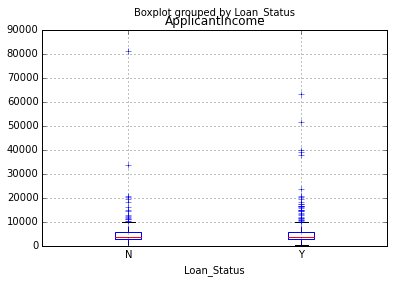

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
data.boxplot(column="ApplicantIncome",by="Loan_Status")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x108d74c90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x108f96310>], dtype=object)

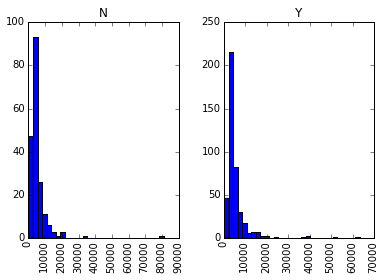

In [74]:
data.hist(column="ApplicantIncome",by="Loan_Status",bins=30)

This shows that income is not a big deciding factor on its own as there is no appreciable difference between the people who received and were denied the loan.



# 10 – Cut function for binning

Sometimes numerical values make more sense if clustered together. For example, if we’re trying to model traffic (#cars on road) with time of the day (minutes). The exact minute of an hour might not be that relevant for predicting traffic as compared to actual period of the day like “Morning”, “Afternoon”, “Evening”, “Night”, “Late Night”. Modeling traffic this way will be more intuitive and will avoid overfitting.

Here we define a simple function which can be re-used for binning any variable fairly easily.

In [75]:
#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

#Binning age:
cut_points = [90,140,190]
labels = ["low","medium","high","very high"]
data["LoanAmount_Bin"] = binning(data["LoanAmount"], cut_points, labels)
print pd.value_counts(data["LoanAmount_Bin"], sort=False)

low          104
medium       273
high         146
very high     91
dtype: int64


# 11 – Coding nominal data

Often, we find a case where we’ve to modify the categories of a nominal variable. This can be due to various reasons:

Some algorithms (like Logistic Regression) require all inputs to be numeric. So nominal variables are mostly coded as 0, 1….(n-1)
Sometimes a category might be represented in 2 ways. For e.g. temperature might be recorded as “High”, “Medium”, “Low”, “H”, “low”. Here, both “High” and “H” refer to same category. Similarly, in “Low” and “low” there is only a difference of case. But, python would read them as different levels.
Some categories might have very low frequencies and its generally a good idea to combine them.
Here I’ve defined a generic function which takes in input as a dictionary and codes the values using ‘replace’ function in Pandas.

In [76]:
#Define a generic function using Pandas replace function
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded
 
#Coding LoanStatus as Y=1, N=0:
print 'Before Coding:'
print pd.value_counts(data["Loan_Status"])
data["Loan_Status_Coded"] = coding(data["Loan_Status"], {'N':0,'Y':1})
print '\nAfter Coding:'
print pd.value_counts(data["Loan_Status_Coded"])

Before Coding:
Y    422
N    192
dtype: int64

After Coding:
1    422
0    192
dtype: int64


Similar counts before and after proves the coding.



# 12 – Iterating over rows of a dataframe

This is not a frequently used operation. Still, you don’t want to get stuck. Right? At times you may need to iterate through all rows using a for loop. For instance, one common problem we face is the incorrect treatment of variables in Python. This generally happens when:

Nominal variables with numeric categories are treated as numerical.
Numeric variables with characters entered in one of the rows (due to a data error) are considered categorical.
So it’s generally a good idea to manually define the column types. If we check the data types of all columns:

In [77]:
#Check current type:
data.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
LoanAmount_Bin       category
Loan_Status_Coded       int64
dtype: object

Here we see that Credit_History is a nominal variable but appearing as float. A good way to tackle such issues is to create a csv file with column names and types. This way, we can make a generic function to read the file and assign column data types. For instance, here I have created a csv file datatypes.csv.

In [78]:
#Load the file:
#Load the file:
#pd.read_csv()
#colTypes = pd.read_csv('datatypes.csv')
#print colTypes
colTypes = pd.read_csv('data_type.csv',sep='\t')
print colTypes

              feature      type
0              Gender  category
1             Married  category
2          Dependents  category
3           Education  category
4       Self_Employed  category
5     ApplicantIncome  category
6   CoapplicantIncome      cont
7          LoanAmount      cont
8    Loan_Amount_Term      cont
9      Credit_History      cont
10      Property_Area  category
11        Loan_Status  category
12     LoanAmount_Bin  category
13  Loan_Status_Coded  category


After loading this file, we can iterate through each row and assign the datatype using column ‘type’ to the variable name defined in the ‘feature’ column.



In [79]:
#Iterate through each row and assign variable type.
#Note: astype is used to assign types

for i, row in colTypes.iterrows(): #i: dataframe index; row: each row in series format
  if row['feature']=="category":
    data[row['feature']]=data[row['feature']].astype(np.object)
  elif row['feature']=="cont":
    data[row['feature']]=data[row['feature']].astype(np.float)
print data.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
LoanAmount_Bin       category
Loan_Status_Coded       int64
dtype: object


Now the credit history column is modified to ‘object’ type which is used for representing nominal variables in Pandas.

# End Notes

In this article, we covered various functions of Pandas which can make our life easy while performing data exploration and feature engineering. Also, we defined some generic functions which can be reused for achieving similar objective on different datasets.

Also See: If you have any doubts pertaining to Pandas or Python in general, feel free to discuss with us.

Did you find the article useful? Do you use some better (easier/faster) techniques for performing the tasks discussed above? Do you think there are better alternatives to Pandas in Python? We’ll be glad if you share your thoughts as comments below.